# Probabilités conditionnelles

Avant de commencer, regardons une [animation sympa](http://setosa.io/conditional/) sur les probabilités conditionnelles.

### Exemple 1

Un joueur lance successivement deux dés non pipés. 

Le tableau suivant montre toutes les valeurs possibles de la somme en fonction de la valeur de chaque dé : 

|(d1 / d2) | 1  | 2 | 3 | 4 | 5 | 6 |
|----|----|---|---|---|---|---|
| **1**  | 2  | 3 | 4 | 5 | 6 | 7 |
| **2**  | 3  | 4 | 5 | 6 | 7 | 8 |
| **3**  | 4  | 5 | 6 | 7 | 8 | 9 |
| **4**  | 5  | 6 | 7 | 8 | 9 | 10 |
| **5**  | 6  | 7 | 8 | 9 | 10 | 11 |
| **6**  | 7  | 8 | 9 | 10 | 11 | 12 |
 
Considérons maintenant l'événement *A* : "la somme des dés est supérieure ou égale à 10". Le tableau suivant permet de voir que $\mathbb{P}(A) = 1/6$. Expliquez comment retrouver ce résultat.


|(d1 / d2) | 1  | 2 | 3 | 4 | 5 | 6 |
|----|----|---|---|---|---|---|
| **1**  | 2  | 3 | 4 | 5 | 6 | 7 |
| **2**  | 3  | 4 | 5 | 6 | 7 | 8 |
| **3**  | 4  | 5 | 6 | 7 | 8 | 9 |
| **4**  | 5  | 6 | 7 | 8 | 9 | <p style="color:red"> 10 </p>| 
| **5**  | 6  | 7 | 8 | 9 | <p style="color:red">10</p> | <p style="color:red">11</p> |
| **6**  | 7  | 8 | 9 | <p style="color:red">10</p> | <p style="color:red">11</p> | <p style="color:red">12</p> |

On peut simuler cette expérience en utilisant la function *rollDie*.

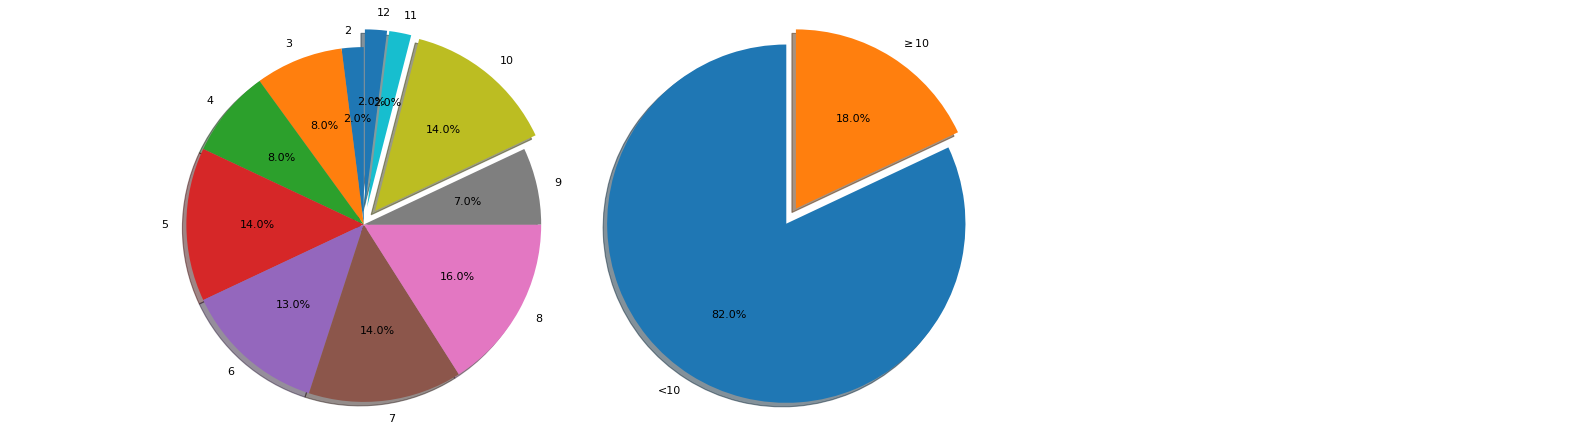

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from functions import roll_die

% matplotlib inline

def lance2des(n):
    """
    Lancer deux dés non pipés n fois 
    """
    d1, d2 = roll_die(n), roll_die(n)
    return(d1, d2)

d1, d2 = lance2des(100)

d1_plus_d2 = [i+j for i, j in zip(d1, d2)]
values = list(set(d1_plus_d2))
values.sort()
frequencies = [d1_plus_d2.count(i) for i in values]
lower_than10 = sum(frequencies[:-3])
greater_than10 = sum(frequencies[-3:])
labels = ["<10", r"$\geq 10$"]


# Doing the plot
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1) 
fig = plt.figure(figsize=(25, 15), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(211)
ax1.pie(frequencies, explode=explode, labels=values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

explode = (0, 0.1) 
ax2.pie([lower_than10, greater_than10], explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90)
ax2.axis('equal')

plt.show()
#plt.pie(frequency, labels=values)

Considérons maintenant l'événement $C$ : "on a obtenu $4$ avec le dé numéro $1$". Quelle serait maintenant la probabilité que la somme des dés soit supérieure ou égale à 10 ?


|(d1 / d2) | 1  | 2 | 3 | 4 | 5 | 6 |
|----|----|---|---|---|---|---|
| **1**  | 2  | 3 | 4 | 5 | 6 | 7 |
| **2**  | 3  | 4 | 5 | 6 | 7 | 8 |
| **3**  | 4  | 5 | 6 | 7 | 8 | 9 |
| **4**  | <p style="color:blue"> 5 </p> | <p style="color:blue"> 6 </p> | <p style="color:blue"> 7 </p> | <p style="color:blue"> 8 </p> | <p style="color:blue"> 9 </p> | <p style="color:green"> 10 </p>| 
| **5**  | 6  | 7 | 8 | 9 | <p style="color:red">10</p> | <p style="color:red">11</p> |
| **6**  | 7  | 8 | 9 | <p style="color:red">10</p> | <p style="color:red">11</p> | <p style="color:red">12</p> |

À l'aide du tableau, on peut voir que la probabilité que la somme des points soit supérieur ou égale à $10$, étant doné qu'on a eu $4$ avec le dé numéro $1$ équivaut à compter le nombre de valeurs supérieures ou égales à $10$ qui se trouvent dans la ligne $4$ du tableau. Expliquez comment caculer cette probabilité.



### À vous de jouer

1. Vérifier à l'aide de la fonction *lance2des* que $\mathbb{P}(A|C)$ vaut $\frac{1}{6}$

## Formule des probabilités totales

Nous allons voir un exemple du poly du cours de Probabilités et Statistiques (Exemple 2.12 page 20). 

*On prend $100$ dés dont 25 sont pipés. Pour ces derniers la probabilité d'obtenir un $6$ vaut $\frac{1}{2}$. On choisit un dé au hassard et on le lance. Calculer la probabilité d'obtenir un 6.*

À l'aide de la formule des probabilités totales on a :

$$\mathbb{P}(6) = \mathbb{P}(6\ |"dé\ choisi\ est\ non\ pipé")\mathbb{P}("choisir\ un\ dé\ non\ pipé") + \mathbb{P}(6\ |"dé\ choisi\ est\ pipé")\mathbb{P}("choisir\ un\ dé\ pipé")$$
$$\mathbb{P}(6) = \frac{1}{6}\times\frac{75}{100} + \frac{1}{2}\times\frac{25}{100}=\frac{1}{4}$$

**À l'aide des simulations, vérifiez ce resultat.**



In [5]:
des1, des2 = lance2des(10)

In [6]:
print("des1= ",des1)
print("des2= ",des2)

('des1= ', [6, 5, 6, 2, 3, 1, 5, 2, 3, 5])
('des2= ', [4, 1, 6, 1, 4, 5, 5, 6, 6, 2])
